## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 20 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [11]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

reduce_lr_factor = [0.25,0.5,0.9]
reduce_lr_patient = [1,5,10]

In [ ]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, reduce_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.25, reduce_patient: 1
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
b

50000/50000 [==============================] - 4s 83us/step - loss: 3.0182 - accuracy: 0.1100 - val_loss: 2.8828 - val_accuracy: 0.1051

Epoch 00011: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Epoch 12/20
50000/50000 [==============================] - 4s 83us/step - loss: 3.0186 - accuracy: 0.1098 - val_loss: 2.9190 - val_accuracy: 0.1053
Epoch 13/20
50000/50000 [==============================] - 4s 83us/step - loss: 3.0176 - accuracy: 0.1099 - val_loss: 2.9479 - val_accuracy: 0.1052
Epoch 14/20
50000/50000 [==============================] - 5s 91us/step - loss: 3.0170 - accuracy: 0.1101 - val_loss: 2.9698 - val_accuracy: 0.1055
Epoch 15/20
50000/50000 [==============================] - 4s 88us/step - loss: 3.0182 - accuracy: 0.1103 - val_loss: 2.9857 - val_accuracy: 0.1050
Epoch 16/20
50000/50000 [==============================] - 4s 85us/step - loss: 3.0174 - accuracy: 0.1098 - val_loss: 2.9969 - val_accuracy: 0.1052

Epoch 00016: ReduceLROnPlateau reducing le


Epoch 00003: ReduceLROnPlateau reducing learning rate to 5.960464760645934e-11.
Epoch 4/20
50000/50000 [==============================] - 4s 89us/step - loss: 3.0369 - accuracy: 0.0995 - val_loss: 2.6114 - val_accuracy: 0.1284

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.980232380322967e-11.
Epoch 5/20
50000/50000 [==============================] - 5s 91us/step - loss: 3.0364 - accuracy: 0.0991 - val_loss: 2.6610 - val_accuracy: 0.1233

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.4901161901614834e-11.
Epoch 6/20
50000/50000 [==============================] - 5s 95us/step - loss: 3.0361 - accuracy: 0.0990 - val_loss: 2.6997 - val_accuracy: 0.1203

Epoch 00006: ReduceLROnPlateau reducing learning rate to 7.450580950807417e-12.
Epoch 7/20
50000/50000 [==============================] - 5s 104us/step - loss: 3.0371 - accuracy: 0.0992 - val_loss: 2.7379 - val_accuracy: 0.1134

Epoch 00007: ReduceLROnPlateau reducing learning rate to 3.725290475403709e-12.
Epoch

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 98us/step - loss: 2.9409 - accuracy: 0.1055 - val_loss: 2.3701 - val_accuracy: 0.0923
Epoch 2/20
50000/50000 [==============================] - 5s 90us/step - loss: 2.9395 - accuracy: 0.1049 - val_loss: 2.3786 - val_accuracy: 0.1003
Epoch 3/20
50000/50000 [==============================] - 5s 92us/step - loss: 2.9406 - accuracy: 0.1055 - val_loss: 2.4268 - val_accuracy: 0.1103
Epoch 4/20
50000/50000 [==============================] - 5s 90us/step - loss: 2.9410 - accuracy: 0.1056 - val_loss: 2.4845 - val_accuracy: 0.1103
Epoch 5/20
50000/50000 [==============================] - 4s 90us/step - loss: 2.9403 - accuracy: 0.1052 - val_loss: 2.5442 - val_accuracy: 0.1097
Epoch 6/20
50000/50000 [==============================] - 5s 90us/step - loss: 2.9408 - accuracy: 0.1059 - val_loss: 2.6029 - val_accuracy: 0.1109
Epoch 7/20
50000/50000 [==============================] - 6s 112us/s

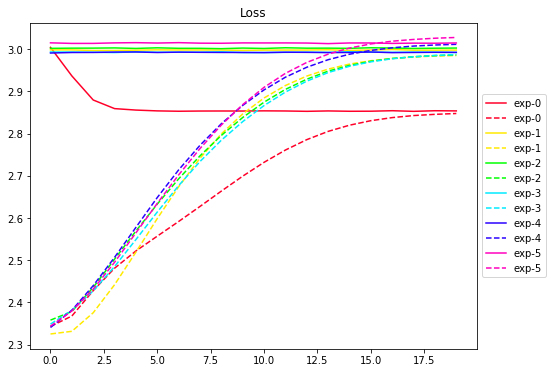

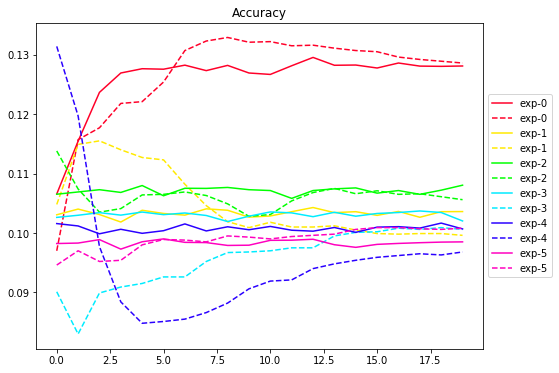

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()